In [7]:
from collections import deque,namedtuple

import matplotlib.pyplot as plt
import networkx as nx

In [21]:
def read_graph(filename, debug=False):
    g = nx.Graph()
    with open(filename, "r") as fh:
        for l in fh:
            a, b = l.strip().split("-")
            if debug: print("{}-{}".format(a,b))
            g.add_edge(a, b)
    return g
            
test1 = read_graph("test1.txt")
print(test1.nodes)
print([n for n in test1.neighbors("start")])
test1

['start', 'A', 'b', 'c', 'd', 'end']
['A', 'b']


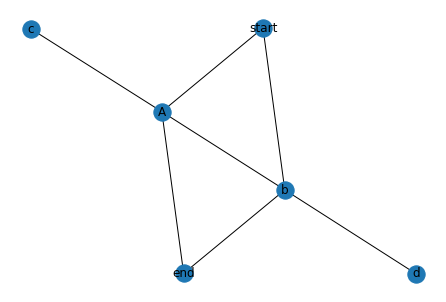

In [12]:
nx.draw(test1, with_labels=True)

In [31]:
def get_all_paths(g, start="start", end="end", debug=False):
    queue = deque()
    queue.append([start])
    #visited = set(start)
    paths = []
    while queue:
        curr = queue.popleft()
        if debug: print(curr)
        if curr[-1] == end:
            paths.append(curr)
        else:
            for n in g.neighbors(curr[-1]):
                if n.isupper() or n not in curr:
                    queue.append(curr + [n])
    return sorted([",".join(p) for p in paths])
        
out1 = get_all_paths(test1)
for o in out1:
    print(o)
len(out1)

start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,end
start,A,c,A,b,A,end
start,A,c,A,b,end
start,A,c,A,end
start,A,end
start,b,A,c,A,end
start,b,A,end
start,b,end


10

In [33]:
test2 = read_graph("test2.txt")
out2 = get_all_paths(test2)
for o in out2:
    print(o)
len(out2)

start,HN,dc,HN,end
start,HN,dc,HN,kj,HN,end
start,HN,dc,end
start,HN,dc,kj,HN,end
start,HN,end
start,HN,kj,HN,dc,HN,end
start,HN,kj,HN,dc,end
start,HN,kj,HN,end
start,HN,kj,dc,HN,end
start,HN,kj,dc,end
start,dc,HN,end
start,dc,HN,kj,HN,end
start,dc,end
start,dc,kj,HN,end
start,kj,HN,dc,HN,end
start,kj,HN,dc,end
start,kj,HN,end
start,kj,dc,HN,end
start,kj,dc,end


19

In [29]:
test3 = read_graph("test3.txt")
len(get_all_paths(test3))

226

In [30]:
inp = read_graph("input.txt")
len(get_all_paths(inp))

3000